# Load all the required Libraries

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from matplotlib import pyplot as plt
from tensorflow.keras import Model, Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

# Loading the pre trained encoder downloaded from canvas

In [2]:
autoencoder = keras.models.load_model('./data/initially_trained_autoencoder.h5')

# Loading the MNIST Dataset

In [3]:



# load MNIST data
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
print(train_images.shape)
print(test_images.shape)

# Flatten the images for a autoencoder input (28x28 is 784 -- therfore, input is 784 neurons)
train_images = np.reshape(train_images, (-1, 784))
test_images = np.reshape(test_images, (-1, 784))
print(train_images.shape)
print(test_images.shape)

# Normalize data - since it's grayscale, we can divide by 255 to get each pixel between 0 and 1
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

(60000, 28, 28)
(10000, 28, 28)
(60000, 784)
(10000, 784)


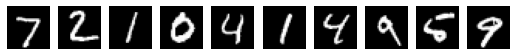

In [4]:



n = 10
plt.figure(figsize=(9, 2))
for i in range(n):
  ax = plt.subplot(1, n, i+1)
  plt.imshow(test_images[i].reshape(28, 28), cmap="gray")
  ax.axis('off')

plt.show()

# Predicting using the pre trained autoencoder

313/313 [==============================] - 2s 7ms/step


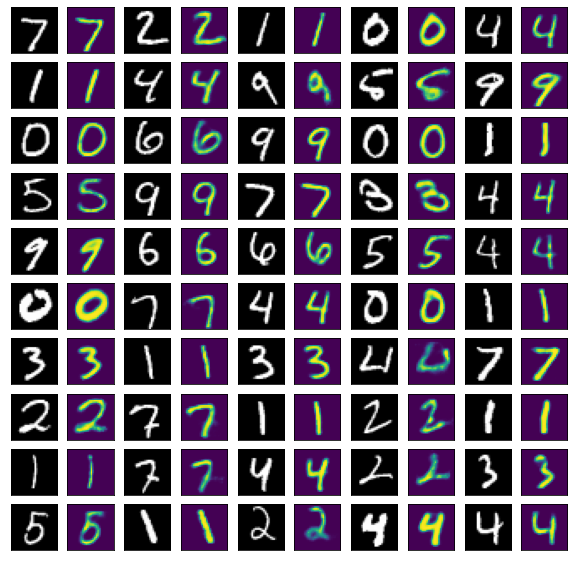

In [5]:
reconstructed_images = autoencoder.predict(test_images)

images = []
for i in range(100):
    images.append(test_images[i].reshape(28,28))
    images.append(reconstructed_images[i].reshape(28,28))
rows = 10
cols = 10
plt.figure(figsize=(10,10))
for i in range(rows*cols):
    plt.subplot(rows,cols,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    if (i%2 == 0):
        plt.imshow(images[i],cmap='gray')
    else:
        plt.imshow(images[i])
plt.show()

# Creating a new Autoencoder

In [6]:

input_dim = 28*28
latent_vec_len = 20 # this is the 'bottleneck' of the autoencoder

# Define the autoencoder architecture
# build the encoder
autoencoder = Sequential()
autoencoder.add(Input(shape=(input_dim,)))
autoencoder.add(Dense(700, activation='relu'))
autoencoder.add(Dense(400, activation='relu'))
autoencoder.add(Dense(100, activation='relu'))

# the bottleneck layer
autoencoder.add(Dense(latent_vec_len, activation='relu'))

# the decoder layer
autoencoder.add(Dense(100, activation='relu'))
autoencoder.add(Dense(400, activation='relu'))
autoencoder.add(Dense(700, activation='relu'))
autoencoder.add(Dense(input_dim, activation='sigmoid'))

# Compile the autoencoder model
autoencoder.compile(loss='binary_crossentropy', optimizer='adam')

# Get summary
autoencoder.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 700)               549500    
                                                                 
 dense_1 (Dense)             (None, 400)               280400    
                                                                 
 dense_2 (Dense)             (None, 100)               40100     
                                                                 
 dense_3 (Dense)             (None, 20)                2020      
                                                                 
 dense_4 (Dense)             (None, 100)               2100      
                                                                 
 dense_5 (Dense)             (None, 400)               40400     
                                                                 
 dense_6 (Dense)             (None, 700)               2

# Training the new encoder on the original MNIST train set

In [12]:
from tensorflow.keras.callbacks import EarlyStopping # EarlyStopping during model training


# Train the autoencoder with MNIST data
early_stop = EarlyStopping(monitor='loss', patience=3, verbose=1)
history = autoencoder.fit(
    x=train_images, # For autoencoders, both the input and the target are the same
    y=train_images, 
    epochs=10, 
    batch_size=128,
    shuffle=True, 
    validation_data=(test_images, test_images),
    callbacks=[early_stop]
)



Epoch 1/10
469/469 [==============================] - 17s 33ms/step - loss: 0.1778 - val_loss: 0.1267
Epoch 2/10
469/469 [==============================] - 16s 34ms/step - loss: 0.1186 - val_loss: 0.1109
Epoch 3/10
469/469 [==============================] - 16s 33ms/step - loss: 0.1082 - val_loss: 0.1047
Epoch 4/10
469/469 [==============================] - 15s 33ms/step - loss: 0.1037 - val_loss: 0.1020
Epoch 5/10
469/469 [==============================] - 15s 33ms/step - loss: 0.1008 - val_loss: 0.0996
Epoch 6/10
469/469 [==============================] - 16s 33ms/step - loss: 0.0989 - val_loss: 0.0990
Epoch 7/10
469/469 [==============================] - 15s 33ms/step - loss: 0.0972 - val_loss: 0.0970
Epoch 8/10
469/469 [==============================] - 16s 33ms/step - loss: 0.0959 - val_loss: 0.0961
Epoch 9/10
469/469 [==============================] - 16s 33ms/step - loss: 0.0948 - val_loss: 0.0955
Epoch 10/10
469/469 [==============================] - 15s 33ms/step - loss: 0.094

# Doing Prediction using the original MNIST test set

313/313 [==============================] - 2s 6ms/step


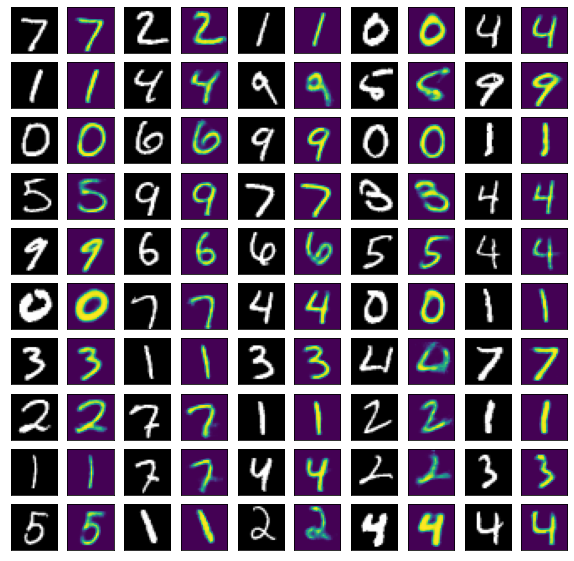

In [14]:
reconstructed_images = autoencoder.predict(test_images)

images = []
for i in range(100):
    images.append(test_images[i].reshape(28,28))
    images.append(reconstructed_images[i].reshape(28,28))
rows = 10
cols = 10
plt.figure(figsize=(10,10))
for i in range(rows*cols):
    plt.subplot(rows,cols,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    if (i%2 == 0):
        plt.imshow(images[i],cmap='gray')
    else:
        plt.imshow(images[i])
plt.show()

# Loading the new images of my initial ie A and processing it

In [28]:
# Define the image paths
image_paths = ['A1.png', 'A2.png', 'A3.png', 'A4.png', 'A5.png']

# Create an empty list to store the preprocessed images
input_images = []

# Load and preprocess each image
for path in image_paths:
    # Load the image
    image = tf.keras.utils.load_img(path, target_size=(28, 28), color_mode="grayscale")

    # Convert the image to an array and normalize between 0 and 1
    input_arr = tf.keras.utils.img_to_array(image) / 255

    # Flatten the image array and add it to the input_images list
    input_images.append(input_arr.flatten())

# Convert the input_images list to a numpy array and reshape it
input_arr = np.array(input_images)
input_arr = input_arr.reshape((input_arr.shape[0], 784))

# Print the shape of the input array
print(input_arr.shape)





(5, 784)


# Adding the new images in the MNIST train and test set 

In [ ]:




bad_images = np.repeat(input_arr, 200, axis=0)
print(bad_images.shape)



bad_images_train = bad_images[int(len(bad_images)*.2):]
bad_images_test = bad_images[int(len(bad_images)*.8):]

new_images_test = np.vstack((test_images, bad_images_test))
new_images_train = np.vstack((train_images, bad_images_train))



print(test_images.shape)
print(train_images.shape)

print(new_images_test.shape)
print(new_images_train.shape)





# Training the new autoencoder model on the new Train sets 

In [30]:
from tensorflow.keras.callbacks import EarlyStopping # EarlyStopping during model training


# Train the autoencoder with MNIST data
early_stop = EarlyStopping(monitor='loss', patience=3, verbose=1)
history = autoencoder.fit(
    x=new_images_train, # For autoencoders, both the input and the target are the same
    y=new_images_train, 
    epochs=15, 
    batch_size=128,
    shuffle=True, 
    validation_data=(new_images_test, new_images_test),
    callbacks=[early_stop]
)


Epoch 1/15
475/475 [==============================] - 16s 34ms/step - loss: 0.0871 - val_loss: 0.0925
Epoch 2/15
475/475 [==============================] - 16s 33ms/step - loss: 0.0868 - val_loss: 0.0922
Epoch 3/15
475/475 [==============================] - 16s 33ms/step - loss: 0.0867 - val_loss: 0.0922
Epoch 4/15
475/475 [==============================] - 16s 33ms/step - loss: 0.0866 - val_loss: 0.0925
Epoch 5/15
475/475 [==============================] - 16s 33ms/step - loss: 0.0865 - val_loss: 0.0924
Epoch 6/15
475/475 [==============================] - 16s 33ms/step - loss: 0.0864 - val_loss: 0.0921
Epoch 7/15
475/475 [==============================] - 16s 33ms/step - loss: 0.0864 - val_loss: 0.0927
Epoch 8/15
475/475 [==============================] - 16s 33ms/step - loss: 0.0862 - val_loss: 0.0921
Epoch 9/15
475/475 [==============================] - 16s 33ms/step - loss: 0.0861 - val_loss: 0.0922
Epoch 10/15
475/475 [==============================] - 16s 33ms/step - loss: 0.086

# Predciting using the new Test sets

319/319 [==============================] - 2s 6ms/step


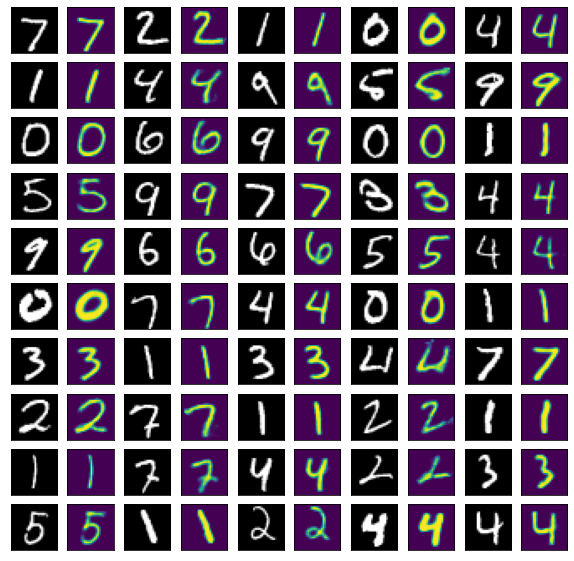

In [31]:
reconstructed_images = autoencoder.predict(new_images_test)

images = []
for i in range(100):
    images.append(test_images[i].reshape(28,28))
    images.append(reconstructed_images[i].reshape(28,28))
rows = 10
cols = 10
plt.figure(figsize=(10,10))
for i in range(rows*cols):
    plt.subplot(rows,cols,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    if (i%2 == 0):
        plt.imshow(images[i],cmap='gray')
    else:
        plt.imshow(images[i])
plt.show()

1/1 [==============================] - 0s 20ms/step


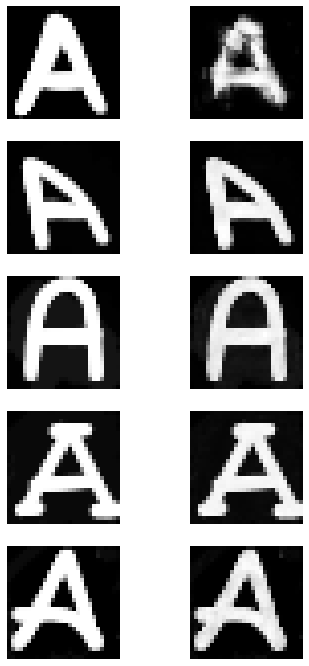

In [33]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

# Define the image paths
image_paths = ['A1.png', 'A2.png', 'A3.png', 'A4.png', 'A5.png']

# Create a figure to display the images and their predictions
fig, axes = plt.subplots(len(image_paths), 2, figsize=(6, 12))

# Loop over the images and make predictions
for i, path in enumerate(image_paths):
    # Load the image
    image = tf.keras.utils.load_img(path, target_size=(28, 28), color_mode="grayscale")

    # Convert the image to an array and normalize between 0 and 1
    input_arr = tf.keras.utils.img_to_array(image) / 255

    # Flatten the image array and add it to the input_images list
    input_arr = input_arr.flatten()
    input_arr = np.array([input_arr])  # Convert single image to a batch with one image in it

    # Make a prediction for the image
    predictions = autoencoder.predict(input_arr)

    # Display the original image and its prediction side by side
    axes[i, 0].imshow(image, cmap="gray")
    axes[i, 0].axis('off')
    axes[i, 1].imshow(predictions[0].reshape(28, 28), cmap="gray")
    axes[i, 1].axis('off')

plt.show()


In [35]:
autoencoder.save('autoencoder_final.h5')